Estimated mu: 10.767
Estimated sigma: 0.700


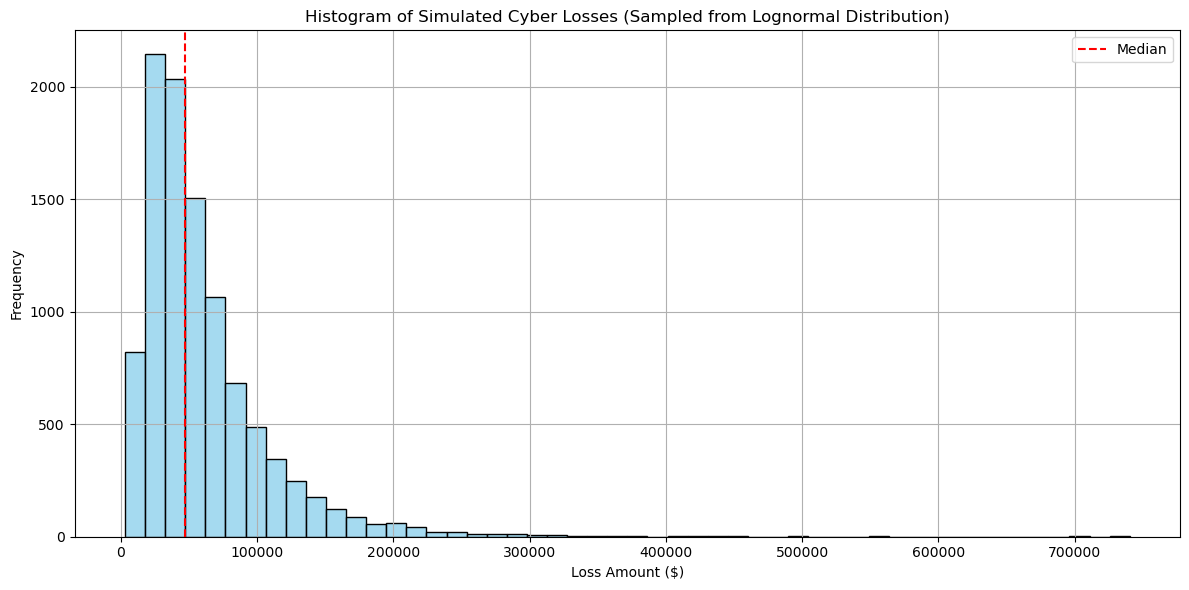

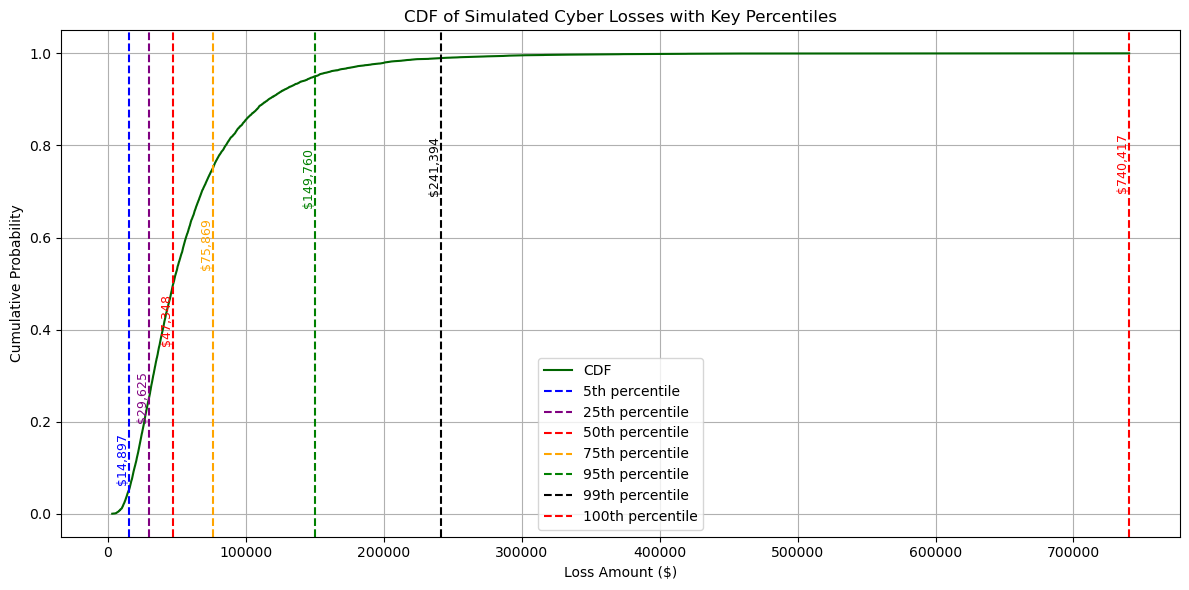


Summary Statistics:
Mean                $60,630
Median              $47,348
5th Percentile      $14,897
95th Percentile    $149,760
99th Percentile    $241,394
Max                $740,417
Min                  $3,047
dtype: object


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Inputs
p5 = 15000      # 5th percentile
p95 = 150000   # 95th percentile

# Step 2: Convert to log scale
ln_p5 = np.log(p5)
ln_p95 = np.log(p95)

# Step 3: Calculate z-scores for 5th and 95th percentiles
z5 = -1.645
z95 = 1.645

# Step 4.1 + 4.2 : Solve for sigma and mu

# Calculate sigma (spread of the distribution in log-space)
# This measures how wide or narrow the lognormal distribution is
# Formula: σ = [ln(P95) - ln(P5)] / (Z95 - Z5)
# The denominator 3.29 is the distance between Z-scores at 5th and 95th percentiles
sigma = (ln_p95 - ln_p5) / (z95 - z5)

# Calculate mu (center of the distribution in log-space)
# This is the mean of the underlying normal distribution
# Formula: μ = ln(P5) + 1.645 × σ (or equivalently: ln(P95) - 1.645 × σ)
# Both formulas give the same result
mu = ln_p5 + 1.645 * sigma

print(f"Estimated mu: {mu:.3f}")
print(f"Estimated sigma: {sigma:.3f}")


# Step 5: Simulate 10,000 cyberattack losses from lognormal
np.random.seed(42)  # for reproducibility
n_simulations = 10_000
simulated_losses = np.random.lognormal(mean=mu, sigma=sigma, size=n_simulations)

# Step 6: Plot histogram of the simulated losses
plt.figure(figsize=(12, 6))
sns.histplot(simulated_losses, bins=50, kde=False, color='skyblue')
plt.axvline(np.percentile(simulated_losses, 50), color='red', linestyle='--', label='Median')
plt.title("Histogram of Simulated Cyber Losses (Sampled from Lognormal Distribution)")
plt.xlabel("Loss Amount ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7 : Plot the CDF with vertical lines for key percentiles
percentiles = [5, 25, 50, 75, 95, 99, 100]
colors = ['blue', 'purple', 'red', 'orange', 'green', 'black', 'red']

# Calculate percentile values
percentile_values = np.percentile(simulated_losses, percentiles)

# Sort the data for CDF
sorted_losses = np.sort(simulated_losses)
cdf = np.arange(1, n_simulations + 1) / n_simulations

plt.figure(figsize=(12, 6))
plt.plot(sorted_losses, cdf, color='darkgreen', label='CDF')

# Add vertical lines and annotations for each percentile
for p, val, color in zip(percentiles, percentile_values, colors):
    plt.axvline(x=val, linestyle='--', color=color, label=f'{p}th percentile')
    plt.text(val, 0.03 + p/150, f"${val:,.0f}", color=color, rotation=90,
             verticalalignment='bottom', horizontalalignment='right', fontsize=9)

plt.title("CDF of Simulated Cyber Losses with Key Percentiles")
plt.xlabel("Loss Amount ($)")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Summary statistics
summary = {
    "Mean": np.mean(simulated_losses),
    "Median": np.median(simulated_losses),
    "5th Percentile": np.percentile(simulated_losses, 5),
    "95th Percentile": np.percentile(simulated_losses, 95),
    "99th Percentile": np.percentile(simulated_losses, 99),
    "Max": np.max(simulated_losses),
    "Min": np.min(simulated_losses)
}

print("\nSummary Statistics:")
print(pd.Series(summary).apply(lambda x: f"${x:,.0f}"))
